In [ ]:
!pip install gdown
!gdown 1wbERwZ4Dce8yrNg1nZEUqwloDVVgPQwW

Downloading...
From (original): https://drive.google.com/uc?id=1wbERwZ4Dce8yrNg1nZEUqwloDVVgPQwW
From (redirected): https://drive.google.com/uc?id=1wbERwZ4Dce8yrNg1nZEUqwloDVVgPQwW&confirm=t&uuid=8c99796b-7641-4c6c-86b6-92247e11f459
To: /content/datasetTA.zip
100% 3.75G/3.75G [00:55<00:00, 67.5MB/s]


In [ ]:
import zipfile
zip_path = '/content/datasetTA.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
!ls
!cd datasetTA/
!ls

datasetTA  datasetTA.zip  sample_data
datasetTA  datasetTA.zip  sample_data


In [ ]:
!head -20 /content/datasetTA/vocab.txt

ஃபண்டின்
ஃபரா
ஃபியூச்சர்
ஃபிரெஞ்சு
ஃபுட்
ஃபூகோ
ஃபேஷியல்
ஃபோர்டிஸ்
ஃப்ரெண்ட்ஸ்
அ
அகக்காழ்
அகதிகளுக்கான
அகதியா
அகத்தே
அகன்றபின்னே
அகப்பாடலில்
அகப்பொருளை
அகமதாபாத்
அகர்வால்
அகற்றப்பட


## Imports

In [ ]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

## Dataset splitting

In [ ]:
base_path = "datasetTA"
words_list = []

words = open(f"{base_path}/fulltrain.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":
        words_list.append(line.rstrip('\n'))

print(len(words_list))

np.random.shuffle(words_list)
words_list[:10]


75730


['65632 அவசரமாக',
 '22847 திருமாலும்',
 '52644 விளங்கிக்',
 '16802 அடிமை',
 '67660 தெரிவித்திருந்தது',
 '42343 வங்கித்துறையில்',
 '72945 ளால்',
 '32510 அதிகளவில்',
 '31792 தூக்கம்',
 '9970 விதவைகளின்']

90:5:5 ratio (train:validation:test).

In [ ]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 68157
Total validation samples: 3786
Total test samples: 3787


In [ ]:
base_image_path = os.path.join(base_path, "train")


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        #print(line_split)
        name = line_split[0] + ".jpg"
        label = line_split[1]
        #paths.append(name)
        #corrected_samples.append(label)
        #if os.path.getsize(name):
        paths.append(str("datasetTA/train/"+str(name)))
        #paths.append(name)
        corrected_samples.append(label)

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
print(train_img_paths[:10], train_labels[:10])
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

['datasetTA/train/65632.jpg', 'datasetTA/train/22847.jpg', 'datasetTA/train/52644.jpg', 'datasetTA/train/16802.jpg', 'datasetTA/train/67660.jpg', 'datasetTA/train/42343.jpg', 'datasetTA/train/72945.jpg', 'datasetTA/train/32510.jpg', 'datasetTA/train/31792.jpg', 'datasetTA/train/9970.jpg'] ['அவசரமாக', 'திருமாலும்', 'விளங்கிக்', 'அடிமை', 'தெரிவித்திருந்தது', 'வங்கித்துறையில்', 'ளால்', 'அதிகளவில்', 'தூக்கம்', 'விதவைகளின்']


In [ ]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    #label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))
print(characters)
# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  32
Vocab size:  81
['-', '0', '1', '2', '3', '4', '5', '7', '8', '9', 'ஃ', 'அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'க', 'ங', 'ச', 'ஜ', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ன', 'ப', 'ம', 'ய', 'ர', 'ற', 'ல', 'ள', 'ழ', 'வ', 'ஶ', 'ஷ', 'ஸ', 'ஹ', 'ா', 'ி', 'ீ', 'ு', 'ூ', 'ெ', 'ே', 'ை', 'ொ', 'ோ', 'ௌ', '்', 'ௐ', 'ௗ', '௦', '௧', '௨', '௩', '௪', '௫', '௬', '௭', '௮', '௯', '௰', '௱', '௲', '௳', '௴', '௵', '௶', '௷', '௸', '௹', '௺']


['அவசரமாக',
 'திருமாலும்',
 'விளங்கிக்',
 'அடிமை',
 'தெரிவித்திருந்தது',
 'வங்கித்துறையில்',
 'ளால்',
 'அதிகளவில்',
 'தூக்கம்',
 'விதவைகளின்']

In [ ]:

def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        #label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)
print(test_labels_cleaned)

['தம்பிக்கும்', 'பயன்படுத்துகின்றன', 'மௌனமா', 'எழும்பூர்', 'நாளுக்கு', 'குறுக்காக', 'நெருக்கடியை', 'முழுதும்', 'வல்லாரைச்', 'கருங்காடு', 'குழந்தைகள்', 'புளியமுத்து', 'உப', 'போகர்', 'ழாக்', 'போனதுதான்', 'பெங்களூருவில்', 'தன்னோட', 'தனியறை', 'எழுகிறது', 'அடக்கியபடிக்குச்', 'முதலிடத்தை', 'திருவடி', 'பூட்டு', 'ஒழுகிக்', 'ஆசிப்', 'டேட்டாவினை', 'தொழில்நுட்பமும்', 'பீச்சுக்கு', 'அருவருப்பு', 'வேகமும்', 'தனித்தன்மைகளை', 'சட்டங்களைப்', 'அதற்கென', 'பஞ்சமும்', 'இப்பொழுது', 'ரசிக்கிற', 'ஒளிபரப்பு', 'உருவாகாமல்', 'சிந்தனையின்படி', 'மக்களுடன்', 'உயர்த்தப்பட்டு', 'வருந்தினார்', 'சினிமாப்', 'பாரம்பரிய', 'கவரும்', 'விக்ரமின்', 'வைப்பவர்', 'குறியீட்டு', 'எடுத்துக்காட்டிய', 'நைட்ரோகிளிசரின்', 'சேவைகளும்', 'விண்கப்பல்', 'க்கு', 'இருப்பதற்கான', 'ஆக்சைடுகள்', 'வர்ணிப்பதிலிருந்து', 'பரவலுக்காகச்', 'துணைவருமான', 'கருவை', 'டல்', 'அணுவியல்', 'அமூலாக்க', 'என்ழைக்கப்படம்', 'டாலராக', 'வழங்கியதால்', 'நம்பிக்கையுடன்', 'எழுந்துவந்த', 'விஷயத்தைச்', 'மிதமான', 'நொறுங்க', 'உணர்கிறார்கள்', 'மொழியினரும்', 'இருட்டுக்கு', 'சா

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

### Resizing images without distortion



In [ ]:

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [ ]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

datasetTA/train/31626.jpg
datasetTA/train/31626.jpg
குடிகொண்டிருப்பது


In [ ]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


In [ ]:
train_ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

அவசரமாக
திருமாலும்
விளங்கிக்
அடிமை
தெரிவித்திருந்தது
வங்கித்துறையில்
ளால்
அதிகளவில்
தூக்கம்
விதவைகளின்
கிரீம்
௩௪
தென்னிலங்கை
போலியானவற்றைக்
குற்றமற்றவள்
கிரெடிட்


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2949 (\N{TAMIL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2997 (\N{TAMIL LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: 

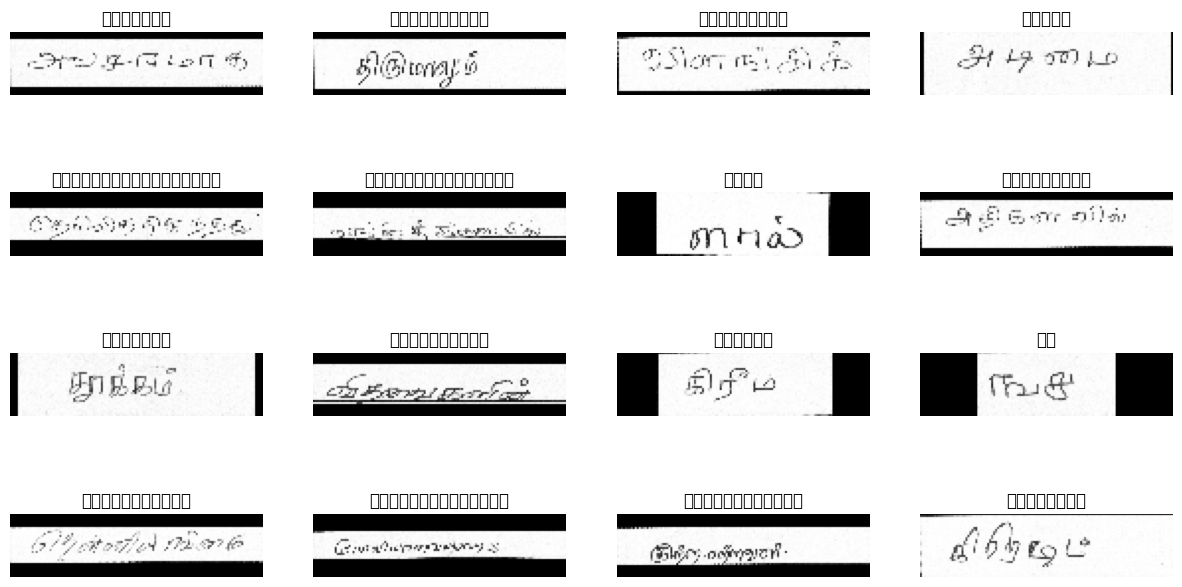

In [ ]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))
    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
!ls -l {train_ds.file_pattern}

ls: cannot access '{train_ds.file_pattern}': No such file or directory


In [ ]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        return y_pred


def build_model():
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))
    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)


    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    output = CTCLayer(name="ctc_loss")(labels, x)

    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )

    opt = keras.optimizers.Adam()
    model.compile(optimizer=opt)
    return model

model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

## Evaluation metrics

In [ ]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

Now, we create a callback to monitor the edit distances.

In [ ]:

def calculate_edit_distance(labels, predictions):
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )


## Training



In [ ]:
epochs = 50

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)


Epoch 1/50
1/1 [==============================] - 1s 1s/step
Mean edit distance for epoch 1: 31.3962
1065/1065 [==============================] - 158s 135ms/step - loss: 29.7954 - val_loss: 28.1268
Epoch 2/50
1/1 [==============================] - 0s 20ms/step
Mean edit distance for epoch 2: 31.0247
1065/1065 [==============================] - 61s 57ms/step - loss: 27.1687 - val_loss: 26.3307
Epoch 3/50
1/1 [==============================] - 0s 21ms/step
Mean edit distance for epoch 3: 30.5358
1065/1065 [==============================] - 61s 58ms/step - loss: 26.0926 - val_loss: 25.2068
Epoch 4/50
1/1 [==============================] - 0s 22ms/step
Mean edit distance for epoch 4: 30.1610
1065/1065 [==============================] - 60s 57ms/step - loss: 24.5831 - val_loss: 22.8986
Epoch 5/50
1/1 [==============================] - 0s 23ms/step
Mean edit distance for epoch 5: 29.4112
1065/1065 [==============================] - 64s 60ms/step - loss: 22.5120 - val_loss: 20.5234
Epoch 6/50

## Inference

2/2 [==============================] - 0s 9ms/step
['தம்டிக்கும்', 'பயன்பருத்துகிற்றன', 'மெனச்சமா', 'எடும்கூர்', 'நாளுக்கு', 'குறுக்காக', 'தெருக்கழியை', 'முழுதும்', 'வல்லாரைச்', 'கருங்காடு', 'குதந்தைகள்', 'பனியருத்து', 'உ', 'போகர்', 'தாக்', 'போனதுததன்', 'பெங்களுகுவில்', 'தன்கனோட', 'தனிபதை', 'எழுகிறது', 'அடக்கியிடடிக்கள்', 'முதவிடத்தை', 'திருவடி', 'பூடடு', 'ஒருகிக்', 'ஆதிப்', 'டேட்டாவினை', 'தொழில்துப்படும்', 'பிச்சுக்கு', 'வழுவருப்து', 'வேகமும்', 'தணித்தவியைகளை', 'கலங்களைப்', 'அதற்கெள', 'பஞ்சமும்', 'இப்பொருருது', 'ரதிக்கிற', 'ஆளியாப்பு', 'தருவாகாமல்', 'சந்தனைவன்யடி', 'மக்களுடன்', 'உயந்தைப்படடி', 'வருஞ்சினார்', 'சிணித்', 'பாரம்கரிய', 'கவரும்', 'விக்கமின்', 'வைப்பவர்', 'கருமட்டு', 'எழுத்துக்காவைய', 'வரடபோகினிததின்', 'சேவைகளும்', 'விணகப்பல', 'க்ரு', 'இருப்பதற்கான', 'அக்சைடுகள்', 'வர்ண்பாதிலிருந்து', 'பதறைக்காகச்', 'துணைவருமான', 'கருவை', 'டல்', 'பெவியில்', 'அருவாக்க', 'எல்லிதைக்கப்பட்ட்']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2958 (\N{TAMIL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2996 (\N{TAMIL LETTER LLLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2953 (\N{TAMIL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


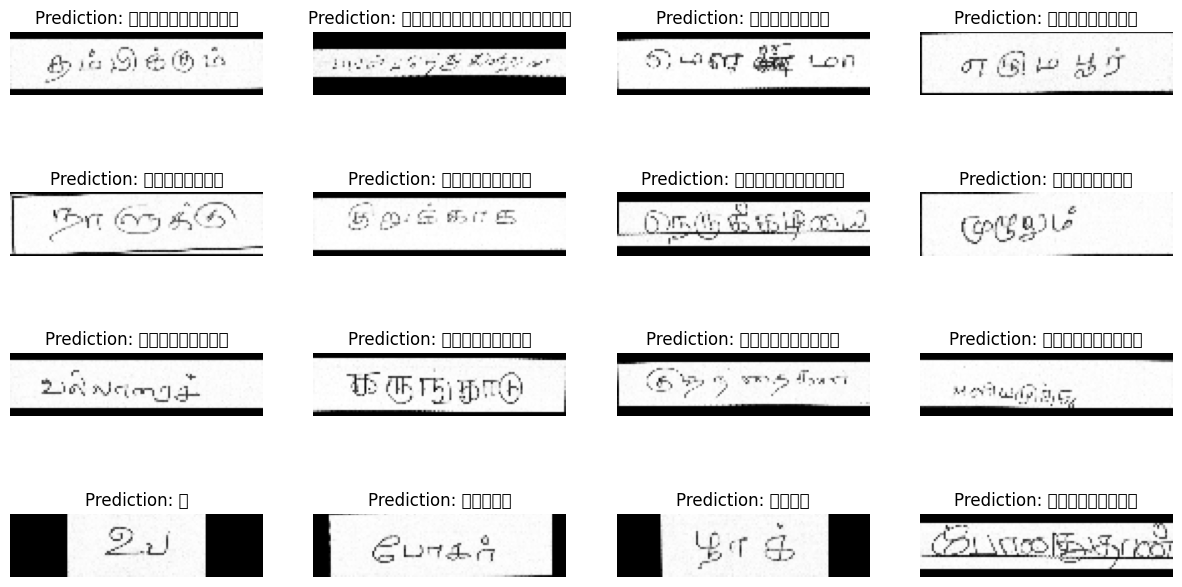

In [ ]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:,:max_len]
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))
    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    print(pred_texts)
    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        plt.rc('axes', unicode_minus=False)
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from google.colab import files

prediction_model.save('TAMIL.keras')
files.download('TAMIL.keras')

In [ ]:
model = tf.keras.models.load_model('TAMIL.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from PIL import Image

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:,:32]
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

def preprocess_image(image_path, img_size=(128, 32)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image)
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = tf.image.rgb_to_grayscale(image)
    image = distortion_free_resize(image, (128, 32))
    image = tf.cast(image, tf.float32) / 255.0
    return image
image_path = '/content/1.jpg'
img = preprocess_image(image_path)
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)
text = decode_batch_predictions(predictions)
print(text)


